<a href="https://colab.research.google.com/github/Anirban095/Freelance-Projects/blob/main/WTP_data_Project/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
#Import required libraries
import pandas as pd
from scipy.optimize import minimize,Bounds,BFGS,SR1,minimize_scalar
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#Read data from stored CSV file (THIS SHOULD POINT TO YOUR FILE's OS)
HW1_filePath =  'Your file path location'
HW1_data = pd.read_csv(HW1_filePath)

In [3]:
HW1_data.head()

,id,WTP,If_rafted_before,If_camped_before,If_trekked_before,Age,Gender,Marital_status
0,1,600,Yes,Yes,No,23,M,Single
1,2,700,No,Yes,Yes,23,M,Single
2,3,600,Yes,Yes,Yes,23,F,Single
3,4,900,Yes,Yes,Yes,28,M,Single
4,5,800,Yes,No,Yes,30,M,Married


# HW1: Question 1

a.

In [4]:
np.mean(HW1_data.WTP[HW1_data.If_rafted_before=="Yes"])

730.0

In [5]:
np.mean(HW1_data.WTP[HW1_data.If_rafted_before=="No"])

726.1904761904761

In [6]:
HW1_data.groupby(['If_rafted_before'])['WTP'].mean()

If_rafted_before
No     726.190476
Yes    730.000000
Name: WTP, dtype: float64

b.

In [7]:
np.mean(HW1_data.WTP[HW1_data.If_camped_before=="Yes"])

775.0

In [8]:
np.mean(HW1_data.WTP[HW1_data.If_camped_before=="No"])

626.9230769230769

In [9]:
HW1_data.groupby(['If_camped_before'])['WTP'].mean()

If_camped_before
No     626.923077
Yes    775.000000
Name: WTP, dtype: float64

c.

In [10]:
HW1_data.groupby(['If_trekked_before'])['WTP'].mean()

If_trekked_before
No     804.166667
Yes    696.551724
Name: WTP, dtype: float64

d.

In [11]:
np.mean(HW1_data.WTP[HW1_data.Age >25])

809.375

In [12]:
np.mean(HW1_data.WTP[HW1_data.Age <= 25])

676.0

e.

In [13]:
HW1_data.groupby(['Gender'])['WTP'].mean()

Gender
F    720.000
M    740.625
Name: WTP, dtype: float64

f.

In [14]:
HW1_data.groupby(['Marital_status'])['WTP'].mean()

Marital_status
Married    1070.000000
Single      680.555556
Name: WTP, dtype: float64

# HW1: Question 2

# HW1: Linear Model

In [15]:
HW1_data.head()

,id,WTP,If_rafted_before,If_camped_before,If_trekked_before,Age,Gender,Marital_status
0,1,600,Yes,Yes,No,23,M,Single
1,2,700,No,Yes,Yes,23,M,Single
2,3,600,Yes,Yes,Yes,23,F,Single
3,4,900,Yes,Yes,Yes,28,M,Single
4,5,800,Yes,No,Yes,30,M,Married


In [16]:
HW1_data['WTP'].unique()

array([ 600,  700,  900,  800,  750, 1200, 1000,  300,  200,  500,  650,
        400,  250, 1500,  350, 1600, 1750,  450])

In [17]:
#Problem #2 - define variables
HW1_data_WTP = HW1_data['WTP']
WTP_price = list(set([wtp for wtp in HW1_data_WTP]))
WTP_demand = []

In [18]:
len(WTP_price)

18

In [19]:
#create demand variable - if WTP >= price...
for price in WTP_price:
    WTP_demand.append(len([wtp for wtp in HW1_data_WTP if wtp >= price]))

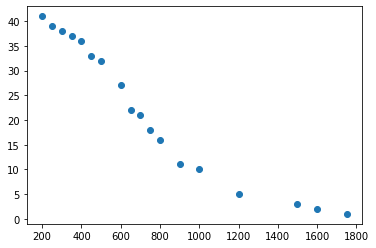

In [20]:
plt.scatter(WTP_price, WTP_demand)

In [21]:
#create regression matrix (CODE BELOW IS ONLY FOR LINEAR REGRESSION - SEE NYHC PYTHON CODE)  
X_input = []
for price in WTP_price:
    X_input.append([price])

In [22]:
X2 = sm.add_constant(X_input)

In [23]:
#WTP_demand = beta0 + beta1 * price
est = sm.OLS(WTP_demand, X2)
est2 = est.fit()
print(est2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     172.7
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           5.46e-10
Time:                        11:40:00   Log-Likelihood:                -50.453
No. Observations:                  18   AIC:                             104.9
Df Residuals:                      16   BIC:                             106.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.8400      1.953     22.448      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


Text(0.5, 1.0, 'Linear Demand, R^2 = 92.0%')

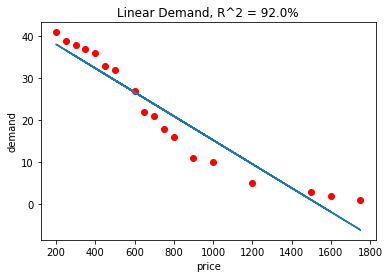

In [24]:
#Print plots (CHANGE THE R^2 TO CONFORM TO YOUR REGRESSION OUTPUT)
plt.plot(WTP_price,WTP_demand, 'ro')
np_X_input=np.array(X_input)
np_D_output=est2.params[0]+est2.params[1]*np_X_input
plt.plot(np_X_input,np_D_output)
plt.xlabel("price"); plt.ylabel("demand")
r_squared = round(est2.rsquared, 2) * 100
plt.title(f"Linear Demand, R^2 = {r_squared}%")


In [28]:
#Set up REVENUE optimization using the LINEAR MODEL for demand...
#Define (negative) revenue
def neg_revenue(p):
    return -p*(est2.params[0]+1.0*p*est2.params[1])

#The analytical optimal solution = -est2.params[0]/(2*est2.params[1])
#Perform the optimization    
result = minimize_scalar(neg_revenue, bounds = (0,np.inf),method = 'brent')
print('Maximum revenue is %f, obtained at price %f.' %(-result.fun,result.x))

Maximum revenue is 16817.991826, obtained at price 767.244563.


In [29]:
est2.params

array([ 4.38399766e+01, -2.85697538e-02])

In [201]:
revenue_liner_model = -result.fun
print(revenue_liner_model[0])
optimal_price_liner_model = result.x
print(optimal_price_liner_model[0])

17686.201758028907
552.6938049384033


# HW1: Logistic Regression

Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [131]:
logit_model = LogisticRegression(max_iter=2000)

In [160]:
df_logit = pd.DataFrame(WTP_demand, columns=['Demand'])
df_logit['price'] = WTP_price

In [170]:
x = df_logit.iloc[:, 1].values
y = df_logit.iloc[:, 0].values
x= x.reshape(-1, 1)

In [171]:
logit_model.fit(x, y)

LogisticRegression(max_iter=2000)

In [172]:
logit_model.predict([[800]])

array([16])

In [178]:
logit_model.coef_.reshape(1,-1)

array([[ 0.61258633,  0.56619649,  0.52404182,  0.41057835,  0.30933432,
         0.24322181,  0.18358457,  0.12870761,  0.08547072,  0.03821872,
        -0.0310013 , -0.12234284, -0.21589355, -0.30082777, -0.40102304,
        -0.51975817, -0.66404721, -0.84704669]])

In [174]:
logit_model.intercept_

array([-580.7470859 , -503.13952796, -437.81583564, -274.27255322,
       -159.10772023,  -96.3395284 ,  -45.74965814,   -3.3682557 ,
         27.9322991 ,   59.86632586,  103.23935026,  153.7232502 ,
        198.09171773,  234.16926972,  271.75345668,  310.35703821,
        350.0716251 ,  391.33583154])

In [182]:
preds = logit_model.predict(x)
preds

array([16,  2, 33, 11, 10, 41, 22, 38, 18,  5, 36, 32,  1, 27, 39,  3, 21,
       37])

In [183]:
y

array([16,  2, 33, 11, 10, 41, 22, 38, 18,  5, 36, 32,  1, 27, 39,  3, 21,
       37])

In [185]:
logit_model.score(x, y)

1.0

In [194]:
def neg_revenue_Logit(p):
  #print(p * logit_model.predict(np.array(p).reshape(-1,1)))
  return -p * logit_model.predict(np.array(p).reshape(-1,1))

#The analytical optimal solution = -est2.params[0]/(2*est2.params[1])
#Perform the optimization    
result_logit = minimize_scalar(neg_revenue_Logit, bounds = (0,2000),method = 'Bounded')
print('Maximum revenue is %f, obtained at price %f.' %(-result_logit.fun,result_logit.x))

Maximum revenue is 17686.201758, obtained at price 552.693805.


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

In [202]:
revenue_logit_model = -result_logit.fun
print(revenue_logit_model[0])
optimal_price_Logit_model = result.x
print(optimal_price_Logit_model[0])

17686.201758028907
552.6938049384033


# HW1: Polynomial Regression

Polynomials

In [30]:
X_input_poly = []
for price in WTP_price:
    X_input_poly.append([price])

In [31]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)

poly_feat = polynomial_features.fit_transform(X_input_poly)
poly_feat.shape

(18, 4)

In [32]:
X_input_poly

[[800],
 [1600],
 [450],
 [900],
 [1000],
 [200],
 [650],
 [300],
 [750],
 [1200],
 [400],
 [500],
 [1750],
 [600],
 [250],
 [1500],
 [700],
 [350]]

In [33]:
poly_feat

array([[1.000000e+00, 8.000000e+02, 6.400000e+05, 5.120000e+08],
       [1.000000e+00, 1.600000e+03, 2.560000e+06, 4.096000e+09],
       [1.000000e+00, 4.500000e+02, 2.025000e+05, 9.112500e+07],
       [1.000000e+00, 9.000000e+02, 8.100000e+05, 7.290000e+08],
       [1.000000e+00, 1.000000e+03, 1.000000e+06, 1.000000e+09],
       [1.000000e+00, 2.000000e+02, 4.000000e+04, 8.000000e+06],
       [1.000000e+00, 6.500000e+02, 4.225000e+05, 2.746250e+08],
       [1.000000e+00, 3.000000e+02, 9.000000e+04, 2.700000e+07],
       [1.000000e+00, 7.500000e+02, 5.625000e+05, 4.218750e+08],
       [1.000000e+00, 1.200000e+03, 1.440000e+06, 1.728000e+09],
       [1.000000e+00, 4.000000e+02, 1.600000e+05, 6.400000e+07],
       [1.000000e+00, 5.000000e+02, 2.500000e+05, 1.250000e+08],
       [1.000000e+00, 1.750000e+03, 3.062500e+06, 5.359375e+09],
       [1.000000e+00, 6.000000e+02, 3.600000e+05, 2.160000e+08],
       [1.000000e+00, 2.500000e+02, 6.250000e+04, 1.562500e+07],
       [1.000000e+00, 1.5

In [34]:
est_poly = sm.OLS(WTP_demand, poly_feat)
est2_poly = est_poly.fit()
print(est2_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     402.8
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           8.08e-14
Time:                        11:40:23   Log-Likelihood:                -32.436
No. Observations:                  18   AIC:                             72.87
Df Residuals:                      14   BIC:                             76.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0994      2.843     17.624      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [35]:
est2_poly.params

array([ 5.00993706e+01, -3.53669876e-02, -1.71592659e-05,  1.25376886e-08])

In [36]:
est2.params

array([ 4.38399766e+01, -2.85697538e-02])

Text(0.5, 1.0, 'Linear Demand, R^2 = 99.0%')

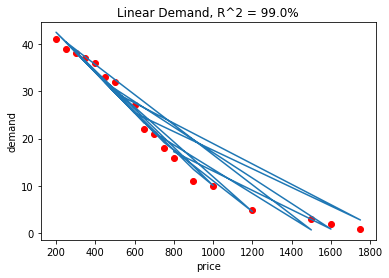

In [39]:
#Print plots (CHANGE THE R^2 TO CONFORM TO YOUR REGRESSION OUTPUT)
plt.plot(WTP_price,WTP_demand, 'ro')
np_X_input=np.array(X_input)
np_D_output=est2_poly.params[0]+ (est2_poly.params[1]*np_X_input) + (est2_poly.params[2]*(np_X_input**2)) + (est2_poly.params[3]* (np_X_input **3))
plt.plot(np_X_input,np_D_output)
plt.xlabel("price"); plt.ylabel("demand")
r_squared = round(est2_poly.rsquared, 2) * 100
plt.title(f"Linear Demand, R^2 = {r_squared}%")


In [46]:
#Set up REVENUE optimization using the LINEAR MODEL for demand...
#Define (negative) revenue
def neg_revenue_poly(p):
    return -p*(est2_poly.params[0]+1.0*p*est2_poly.params[1] + 1.0*(p**2 )*(est2_poly.params[2]) + 1.0*(p**3)*(est2_poly.params[3]))

#The analytical optimal solution = -est2.params[0]/(2*est2.params[1])
#Perform the optimization    
result_poly = minimize_scalar(neg_revenue_poly,bounds = (0,2000),method = 'Bounded')
print('Maximum revenue is %f, obtained at price %f.' %(-result_poly.fun,result_poly.x))

Maximum revenue is 15246.000280, obtained at price 599.483704.


In [206]:
revenue_poly_model = -result_poly.fun
print(revenue_poly_model)
optimal_price_poly_model = result.x
print(optimal_price_poly_model[0])

15246.00028040024
552.6938049384033


In [48]:
est2_poly.params

array([ 5.00993706e+01, -3.53669876e-02, -1.71592659e-05,  1.25376886e-08])

In [204]:
-result_poly.fun

15246.00028040024

# HW1: Question 3

optimal price: 599.48, Maximum Revenue: 15246.00

In [218]:
revenue = [round(revenue_liner_model[0], 2), round(revenue_logit_model[0], 2), round(revenue_poly_model, 2)]
price = [round(optimal_price_liner_model[0], 2), round(optimal_price_Logit_model[0], 2), round(optimal_price_poly_model[0], 2)]
df_optimal = pd.DataFrame({'Total Revenue': revenue, 'Optimal Price': price}, index=['Liner', 'Logistic', 'Polynomial'])


In [219]:
df_optimal

,Total Revenue,Optimal Price
Liner,17686.2,552.69
Logistic,17686.2,552.69
Polynomial,15246.0,552.69


# HW1: Question 4

In [49]:
HW1_data.head()

,id,WTP,If_rafted_before,If_camped_before,If_trekked_before,Age,Gender,Marital_status
0,1,600,Yes,Yes,No,23,M,Single
1,2,700,No,Yes,Yes,23,M,Single
2,3,600,Yes,Yes,Yes,23,F,Single
3,4,900,Yes,Yes,Yes,28,M,Single
4,5,800,Yes,No,Yes,30,M,Married


In [50]:
df_rafted_before = HW1_data[HW1_data['If_rafted_before'] == 'Yes']

In [51]:
df_not_rafted_before = HW1_data[HW1_data['If_rafted_before'] == 'No']

In [52]:
data_WTP_Rafted_Yes = df_rafted_before['WTP']
data_WTP_Rafted_No = df_not_rafted_before['WTP']

In [53]:
WTP_price_rafted_yes = list(set([wtp for wtp in data_WTP_Rafted_Yes]))
WTP_price_rafted_no = list(set([wtp for wtp in data_WTP_Rafted_No]))

In [54]:
WTP_demand_rafted_yes = []
WTP_demand_rafted_no = []

In [55]:
#create demand variable - if WTP >= price...
for price in WTP_price_rafted_yes:
    WTP_demand_rafted_yes.append(len([wtp for wtp in data_WTP_Rafted_Yes if wtp >= price]))

for price in WTP_price_rafted_no:
    WTP_demand_rafted_no.append(len([wtp for wtp in data_WTP_Rafted_No if wtp >= price]))

In [56]:
X_input_rafted_yes = []
for price in WTP_price_rafted_yes:
    X_input_rafted_yes.append([price])

In [57]:
X_input_rafted_no = []
for price in WTP_price_rafted_no:
    X_input_rafted_no.append([price])

In [58]:
poly_feat_rafted_yes = polynomial_features.fit_transform(X_input_rafted_yes)
poly_feat_rafted_no = polynomial_features.fit_transform(X_input_rafted_no)
poly_feat_rafted_yes.shape, poly_feat_rafted_no.shape

((12, 4), (12, 4))

In [59]:
poly_feat_rafted_yes

array([[1.000000e+00, 8.000000e+02, 6.400000e+05, 5.120000e+08],
       [1.000000e+00, 1.600000e+03, 2.560000e+06, 4.096000e+09],
       [1.000000e+00, 9.000000e+02, 8.100000e+05, 7.290000e+08],
       [1.000000e+00, 1.000000e+03, 1.000000e+06, 1.000000e+09],
       [1.000000e+00, 2.000000e+02, 4.000000e+04, 8.000000e+06],
       [1.000000e+00, 3.000000e+02, 9.000000e+04, 2.700000e+07],
       [1.000000e+00, 4.000000e+02, 1.600000e+05, 6.400000e+07],
       [1.000000e+00, 5.000000e+02, 2.500000e+05, 1.250000e+08],
       [1.000000e+00, 1.750000e+03, 3.062500e+06, 5.359375e+09],
       [1.000000e+00, 6.000000e+02, 3.600000e+05, 2.160000e+08],
       [1.000000e+00, 2.500000e+02, 6.250000e+04, 1.562500e+07],
       [1.000000e+00, 7.000000e+02, 4.900000e+05, 3.430000e+08]])

In [60]:
poly_feat_rafted_no

array([[1.00000e+00, 8.00000e+02, 6.40000e+05, 5.12000e+08],
       [1.00000e+00, 4.50000e+02, 2.02500e+05, 9.11250e+07],
       [1.00000e+00, 2.00000e+02, 4.00000e+04, 8.00000e+06],
       [1.00000e+00, 1.00000e+03, 1.00000e+06, 1.00000e+09],
       [1.00000e+00, 6.50000e+02, 4.22500e+05, 2.74625e+08],
       [1.00000e+00, 7.50000e+02, 5.62500e+05, 4.21875e+08],
       [1.00000e+00, 1.20000e+03, 1.44000e+06, 1.72800e+09],
       [1.00000e+00, 5.00000e+02, 2.50000e+05, 1.25000e+08],
       [1.00000e+00, 6.00000e+02, 3.60000e+05, 2.16000e+08],
       [1.00000e+00, 1.50000e+03, 2.25000e+06, 3.37500e+09],
       [1.00000e+00, 7.00000e+02, 4.90000e+05, 3.43000e+08],
       [1.00000e+00, 3.50000e+02, 1.22500e+05, 4.28750e+07]])

In [61]:
est_poly_rafted_yes = sm.OLS(WTP_demand_rafted_yes, poly_feat_rafted_yes).fit()
est_poly_rafted_no = sm.OLS(WTP_demand_rafted_no, poly_feat_rafted_no).fit()

In [62]:
est_poly_rafted_yes.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     323.2
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           1.10e-08
Time:                        11:46:29   Log-Likelihood:                -10.446
No. Observations:                  12   AIC:                             28.89
Df Residuals:                       8   BIC:                             30.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.8679      1.457     16.387      0.000      20.509      27.227
x1            -0.0175      0.007     -2.538      0.035      -0.033      -0.002
x2         -6.144e-06   8.87e-06     -0.693      0.508   -2.66e-05    1.43e-05
x3          5.076e-09   3.16e-09      1.605      0.147   -2.22e-09    1.24e-08
==============================================================================
Omnibus:                        1.229   Durbin-Watson:                   2.323
Prob(Omnibus):                  0.541   Jarque-Bera (JB):                0.927
Skew:                           0.447   Prob(JB):                        0.629
Kurtosis:                       1.974   Cond. No.                     1.42e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
est_poly_rafted_yes.params

array([ 2.38679272e+01, -1.74799723e-02, -6.14434531e-06,  5.07639161e-09])

In [64]:
est_poly_rafted_no.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     90.75
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           1.62e-06
Time:                        11:46:32   Log-Likelihood:                -18.288
No. Observations:                  12   AIC:                             44.58
Df Residuals:                       8   BIC:                             46.51
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3566      3.283      7.114      0.000      15.786      30.927
x1             0.0004      0.015      0.026      0.980      -0.034       0.035
x2         -3.808e-05      2e-05     -1.906      0.093   -8.42e-05    7.99e-06
x3          1.877e-08    7.9e-09      2.375      0.045    5.45e-10     3.7e-08
==============================================================================
Omnibus:                        0.844   Durbin-Watson:                   2.242
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.637
Skew:                           0.114   Prob(JB):                        0.727
Kurtosis:                       1.895   Cond. No.                     9.68e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.68e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Rafted: Yes | Linear Demand, R^2 = 99.0%')

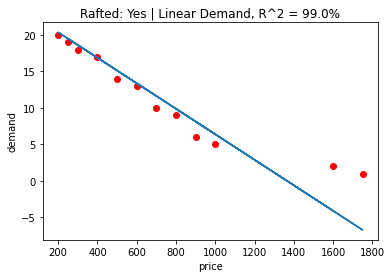

In [65]:
#Print plots (CHANGE THE R^2 TO CONFORM TO YOUR REGRESSION OUTPUT)
plt.plot(WTP_price_rafted_yes,WTP_demand_rafted_yes, 'ro')
np_X_input=np.array(X_input_rafted_yes)
np_D_output=est_poly_rafted_yes.params[0]+ (est_poly_rafted_yes.params[1]*np_X_input) + ((est_poly_rafted_yes.params[2]**2)*np_X_input) + ((est_poly_rafted_yes.params[3]**3)*np_X_input)
plt.plot(np_X_input,np_D_output)
plt.xlabel("price"); plt.ylabel("demand")
r_squared = round(est_poly_rafted_yes.rsquared, 2) * 100
plt.title(f"Rafted: Yes | Linear Demand, R^2 = {r_squared}%")


Text(0.5, 1.0, 'Rafted: No | Linear Demand, R^2 = 97.0%')

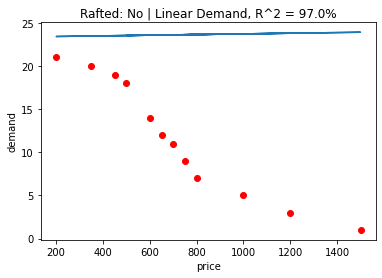

In [66]:
#Print plots (CHANGE THE R^2 TO CONFORM TO YOUR REGRESSION OUTPUT)
plt.plot(WTP_price_rafted_no,WTP_demand_rafted_no, 'ro')
np_X_input=np.array(X_input_rafted_no)
np_D_output=est_poly_rafted_no.params[0] + (est_poly_rafted_no.params[1]*np_X_input) + ((est_poly_rafted_no.params[2]**2)*np_X_input) + ((est_poly_rafted_no.params[3]**3)*np_X_input)
plt.plot(np_X_input,np_D_output)
plt.xlabel("price"); plt.ylabel("demand")
r_squared = round(est_poly_rafted_no.rsquared, 2) * 100
plt.title(f"Rafted: No | Linear Demand, R^2 = {r_squared}%")

In [67]:
np_D_output

array([[23.65998431],
       [23.52727524],
       [23.43248304],
       [23.73581806],
       [23.60310899],
       [23.64102587],
       [23.81165182],
       [23.54623368],
       [23.58415055],
       [23.92540245],
       [23.62206743],
       [23.48935836]])

In [68]:
np_X_input

array([[ 800],
       [ 450],
       [ 200],
       [1000],
       [ 650],
       [ 750],
       [1200],
       [ 500],
       [ 600],
       [1500],
       [ 700],
       [ 350]])

In [69]:
est_poly_rafted_no.params

array([ 2.33566493e+01,  3.79167326e-04, -3.80840391e-05,  1.87668543e-08])

In [70]:
est_poly_rafted_yes.params

array([ 2.38679272e+01, -1.74799723e-02, -6.14434531e-06,  5.07639161e-09])

In [71]:
est2_poly.params

array([ 5.00993706e+01, -3.53669876e-02, -1.71592659e-05,  1.25376886e-08])

In [72]:
est2.params

array([ 4.38399766e+01, -2.85697538e-02])

In [74]:
#Set up REVENUE optimization using the LINEAR MODEL for demand...
#Define (negative) revenue
def neg_revenue_poly_rafted_yes(p):
    return -p*(est_poly_rafted_yes.params[0]+1.0*p*est_poly_rafted_yes.params[1] + 1.0*(p**2 )*(est_poly_rafted_yes.params[2]) + 1.0*(p**3)*(est_poly_rafted_yes.params[3]))

#The analytical optimal solution = -est2.params[0]/(2*est2.params[1])
#Perform the optimization    
result_poly_rafted_yes = minimize_scalar(neg_revenue_poly_rafted_yes,bounds = (0,2000),method = 'brent')
print('Maximum revenue is %f, obtained at price %f.' %(-result_poly_rafted_yes.fun,result_poly_rafted_yes.x))

Maximum revenue is 7364.590276, obtained at price 618.445786.


In [84]:
revenue_rafted_yes = -result_poly_rafted_yes.fun
revenue_rafted_yes

7364.590276273623

In [75]:
len(HW1_data[HW1_data['WTP'] > 767]) * 767

12272

In [76]:
#Set up REVENUE optimization using the LINEAR MODEL for demand...
#Define (negative) revenue
def neg_revenue_poly_rafted_no(p):
    return -p*(est_poly_rafted_no.params[0]+1.0*p*est_poly_rafted_no.params[1] + 1.0*(p**2 )*(est_poly_rafted_no.params[2]) + 1.0*(p**3)*(est_poly_rafted_no.params[3]))

#The analytical optimal solution = -est2.params[0]/(2*est2.params[1])
#Perform the optimization    
result_poly_rafted_no = minimize_scalar(neg_revenue_poly_rafted_no,bounds = (0,np.inf),method = 'brent')
print('Maximum revenue is %f, obtained at price %f.' %(-result_poly_rafted_no.fun,result_poly_rafted_no.x))

Maximum revenue is 8367.506418, obtained at price 580.153973.


In [85]:
revenue_rafted_no = -result_poly_rafted_no.fun
revenue_rafted_no

8367.506418476974

In [86]:
total_revenue = revenue_rafted_yes + revenue_rafted_no
total_revenue

15732.096694750599

In [220]:
df_optimal

,Total Revenue,Optimal Price
Liner,17686.2,552.69
Logistic,17686.2,552.69
Polynomial,15246.0,552.69


# HW2: